In [1]:
#1.	Read the Data:
import pandas as pd
df=pd.read_csv("gene_expression.csv")

In [2]:
df

,Sample,Gene_Expression,Gene_A_Expression,Gene_B_Expression
0,Sample1,5.1,2.5,3.5
1,Sample1,4.8,2.3,3.6
2,Sample2,6.2,3.2,4.2
3,Sample2,5.9,3.1,4.3
4,Sample3,4.4,2.1,3.0
5,Sample3,4.6,2.2,3.1
6,Sample4,6.0,3.0,4.1
7,Sample4,6.3,3.3,4.5
8,Sample5,5.2,2.6,3.7
9,Sample5,5.4,2.7,3.8


In [3]:
#Display the first few rows of the dataset to understand its structure.
df.head()

,Sample,Gene_Expression,Gene_A_Expression,Gene_B_Expression
0,Sample1,5.1,2.5,3.5
1,Sample1,4.8,2.3,3.6
2,Sample2,6.2,3.2,4.2
3,Sample2,5.9,3.1,4.3
4,Sample3,4.4,2.1,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sample             10 non-null     object 
 1   Gene_Expression    10 non-null     float64
 2   Gene_A_Expression  10 non-null     float64
 3   Gene_B_Expression  10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 452.0+ bytes


In [6]:
#●	Calculate the basic statistics (mean, median, standard deviation) for the gene expression levels.
df.describe()

,Gene_Expression,Gene_A_Expression,Gene_B_Expression
count,10.000000,10.000000,10.000000
mean,5.390000,2.700000,3.780000
std,0.682235,0.432049,0.500666
min,4.400000,2.100000,3.000000
25%,4.875000,2.350000,3.525000
50%,5.300000,2.650000,3.750000
75%,5.975000,3.075000,4.175000
max,6.300000,3.300000,4.500000


In [7]:
import plotly.graph_objects as go

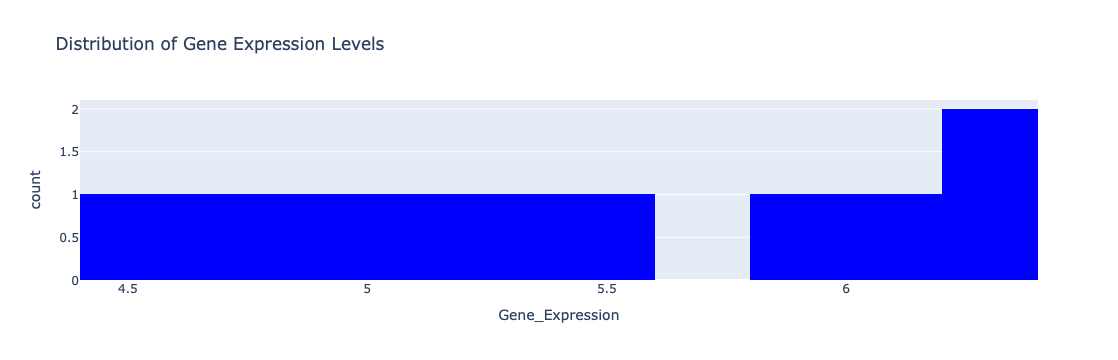

In [18]:
import plotly.express as px



# Create a histogram for gene expression levels
fig = px.histogram(
    df, 
    x="Gene_Expression", 
    nbins=10,                # Number of bins
    title="Distribution of Gene Expression Levels", 
    color_discrete_sequence=["blue"]  # Custom color
)

# Show plot
fig.show()


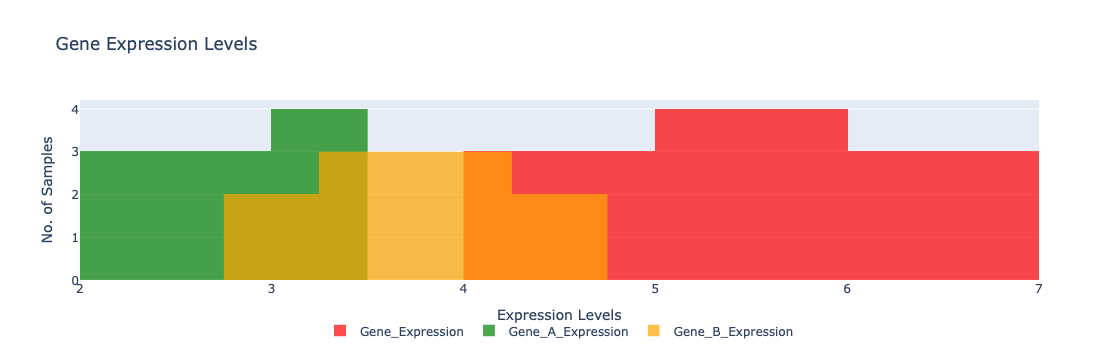

In [15]:
import plotly.graph_objects as go


# Create histograms
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df["Gene_Expression"],
    name="Gene_Expression",
    marker_color='red',
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df["Gene_A_Expression"],
    name="Gene_A_Expression",
    marker_color='green',
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df["Gene_B_Expression"],
    name="Gene_B_Expression",
    marker_color='orange',
    opacity=0.7
))

# Update layout
fig.update_layout(
    title="Gene Expression Levels",
    xaxis_title="Expression Levels",
    yaxis_title="No. of Samples",
    barmode="overlay",  # Overlapping histograms
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.2)  # Adjust legend position
)

# Show plot
fig.show()



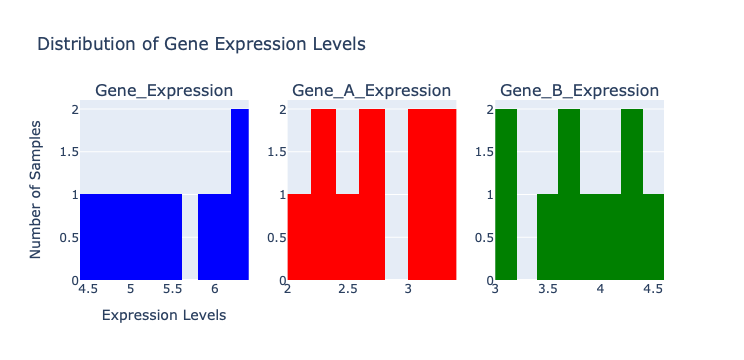

In [19]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Create subplots
fig = make_subplots(
    rows=1, cols=3,  # 1 row, 3 columns for the histograms
    subplot_titles=("Gene_Expression", "Gene_A_Expression", "Gene_B_Expression")
)

# Add histograms for each gene expression column
fig.add_trace(
    go.Histogram(x=df["Gene_Expression"], nbinsx=10, name="Gene_Expression", marker_color="blue"),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=df["Gene_A_Expression"], nbinsx=10, name="Gene_A_Expression", marker_color="red"),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df["Gene_B_Expression"], nbinsx=10, name="Gene_B_Expression", marker_color="green"),
    row=1, col=3
)

# Update layout for better visuals
fig.update_layout(
    title="Distribution of Gene Expression Levels",
    xaxis_title="Expression Levels",
    yaxis_title="Number of Samples",
    showlegend=False,  # Hides the legend since titles are already descriptive
)

# Show plot
fig.show()


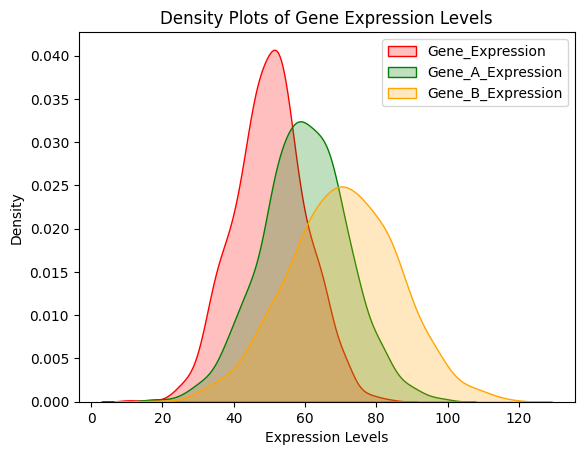

In [64]:
#Create a density plot to complement the histogram.
import seaborn as sb
import matplotlib.pyplot as plt

#Plotting a density plot to complement the histogram
sb.kdeplot(df['Gene_Expression'], label='Gene_Expression', fill=True, color="red")
sb.kdeplot(df['Gene_A_Expression'], label='Gene_A_Expression', fill=True, color="green")
sb.kdeplot(df['Gene_B_Expression'], label='Gene_B_Expression', fill=True, color="orange")

plt.legend(loc='upper right')
plt.xlabel('Expression Levels')
plt.ylabel('Density')
plt.title('Density Plots of Gene Expression Levels')
plt.show()

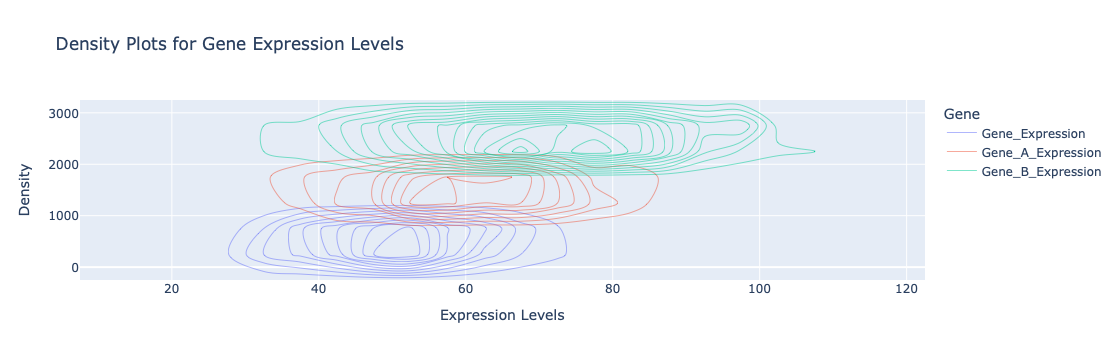

In [32]:
import pandas as pd
import numpy as np
import plotly.express as px

# Generate example data for three expression levels
data = {
    "Gene_Expression": np.random.normal(50, 10, 1000),
    "Gene_A_Expression": np.random.normal(60, 12, 1000),
    "Gene_B_Expression": np.random.normal(70, 15, 1000)
}
df = pd.DataFrame(data)

# Melt the dataframe for plotting in a single figure
df_melted = df.melt(var_name="Gene", value_name="Expression_Level")

# Plot density using Plotly Express
fig = px.density_contour(
    df_melted, 
    x="Expression_Level", 
    color="Gene",  # Different color for each gene
    title="Density Plots for Gene Expression Levels"
)

# Update layout
fig.update_layout(
    xaxis_title="Expression Levels",
    yaxis_title="Density"
)

fig.show()


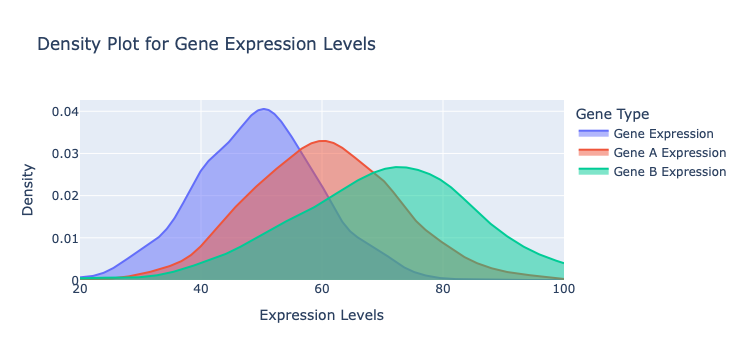

In [39]:
import numpy as np
from scipy.stats import gaussian_kde
import plotly.graph_objects as go

# Generate example data for three expression levels
Gene_expression = np.random.normal(50, 10, 1000)  # Example data for Gene_Expression
Gene_A_expression = np.random.normal(60, 12, 1000)  # Example data for Gene_A_Expression
Gene_B_expression = np.random.normal(70, 15, 1000)  # Example data for Gene_B_Expression

# Kernel Density Estimation (KDE) for each dataset
kde_gene = gaussian_kde(gene_expression)
kde_gene_a = gaussian_kde(gene_a_expression)
kde_gene_b = gaussian_kde(gene_b_expression)

x_vals = np.linspace(20, 100, 500)  # Common x-axis range

# Compute KDE values
y_gene = kde_gene(x_vals)
y_gene_a = kde_gene_a(x_vals)
y_gene_b = kde_gene_b(x_vals)

# Create the figure
fig = go.Figure()

# Add density trace for Gene Expression
fig.add_trace(go.Scatter(
    x=x_vals, y=y_gene,
    fill="tozeroy",
    name="Gene Expression"
))

# Add density trace for Gene A Expression
fig.add_trace(go.Scatter(
    x=x_vals, y=y_gene_a,
    fill="tozeroy",
    name="Gene A Expression"
))

# Add density trace for Gene B Expression
fig.add_trace(go.Scatter(
    x=x_vals, y=y_gene_b,
    fill="tozeroy",
    name="Gene B Expression"
))

# Update layout
fig.update_layout(
    title="Density Plot for Gene Expression Levels",
    xaxis_title="Expression Levels",
    yaxis_title="Density",
    legend_title="Gene Type"
)

fig.show()


In [48]:
data = pd.read_csv("gene_expression.csv")

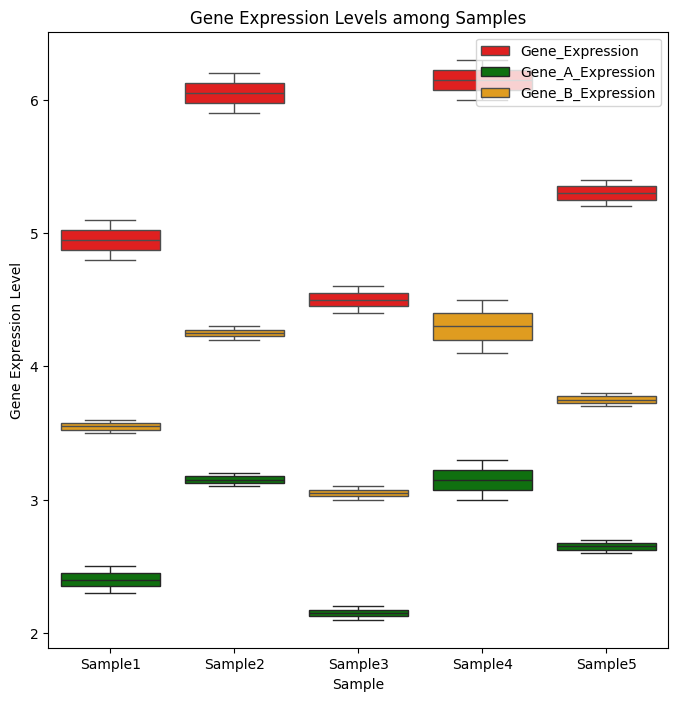

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Assuming 'df' is your dataframe containing the necessary columns

# Create a figure for boxplot
plt.figure(figsize=(8, 8))

# Plotting box plots for Gene_Expression, Gene_A_Expression, and Gene_B_Expression
sb.boxplot(x="Sample", y="Gene_Expression", data=data, color="red", label="Gene_Expression")
sb.boxplot(x="Sample", y="Gene_A_Expression", data=data, color="green", label="Gene_A_Expression")
sb.boxplot(x="Sample", y="Gene_B_Expression", data=data, color="orange", label="Gene_B_Expression")

# Add legend, labels, and title
plt.legend(loc='upper right')
plt.xlabel("Sample")
plt.ylabel("Gene Expression Level")
plt.title("Gene Expression Levels among Samples")

# Show the plot
plt.show()


/var/folders/jb/tm9nnps15vq9957p_1j8265h0000gn/T/ipykernel_42928/3665650863.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




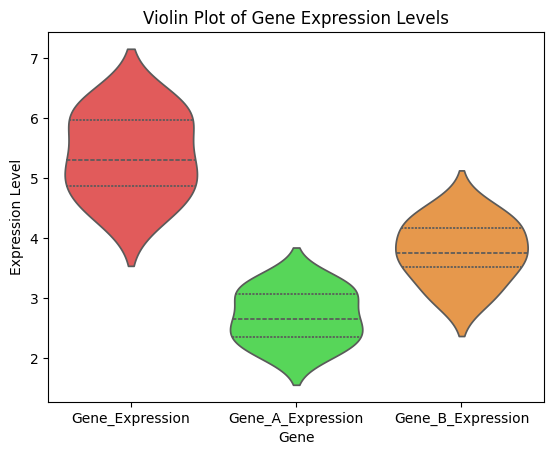

In [58]:
# Defining colour set
custom_colour=["#f74545", "#42eb45", "#ff9833"]

# Creating a violin plot
plt.figure()
sb.violinplot(x='Gene', y='Expression_Level', data=expression_melted, palette=custom_colour, inner="quartile")

plt.title('Violin Plot of Gene Expression Levels')
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.show()

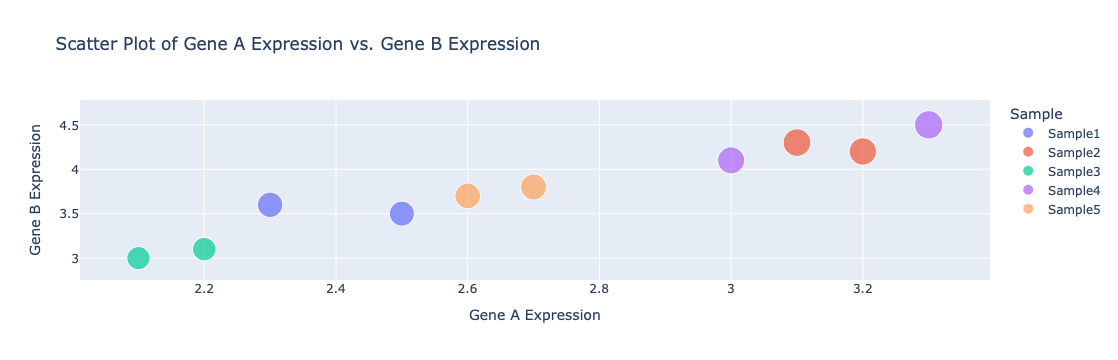

In [63]:
import plotly.express as px

# Create a scatter plot for Gene_A_Expression vs Gene_B_Expression
fig = px.scatter(
    data_frame=data,                  # Your DataFrame
    x="Gene_A_Expression",            # X-axis: Gene_A_Expression
    y="Gene_B_Expression",            # Y-axis: Gene_B_Expression
    color="Sample",# Hue: Sample (for coloring)
    size="Gene_B_Expression",
    title="Scatter Plot of Gene A Expression vs. Gene B Expression",  # Title
    labels={"Gene_A_Expression": "Gene A Expression",  # X-axis label
            "Gene_B_Expression": "Gene B Expression"}, # Y-axis label
)

# Show the plot
fig.show()


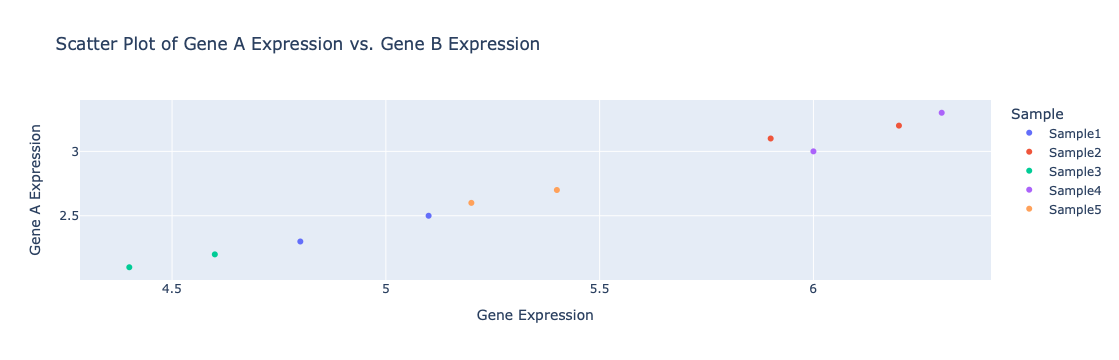

In [60]:
import plotly.express as px

# Create a scatter plot for Gene_A_Expression vs Gene_B_Expression
fig = px.scatter(
    data_frame=data,                  # Your DataFrame
    x="Gene_Expression",            # X-axis: Gene_A_Expression
    y="Gene_A_Expression",            # Y-axis: Gene_B_Expression
    color="Sample",                   # Hue: Sample (for coloring)
    title="Scatter Plot of Gene A Expression vs. Gene B Expression",  # Title
    labels={"Gene_A_Expression": "Gene A Expression",  # X-axis label
            "Gene_Expression": "Gene Expression"}, # Y-axis label
)

# Show the plot
fig.show()
